# Bank Customers Churn Prediction

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set_style("white")


#for clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,  confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Progetto AI

Mounted at /content/drive
/content/drive/MyDrive/Progetto AI


## Load the Data

In [3]:
df = pd.read_csv("BankChurners.csv")
df = df.iloc[:,:-2] #because the kaggle page suggests to ignore the last two features
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Data Dictionary
+ **CLIENTNUM:** Client number. Unique identifier for the customer holding the account
+ **Attrition_Flag:** Internal event (customer activity) variable - if the account is closed then 1 else 0
+ **Customer_Age:** Demographic variable - Customer's Age in Years
+ **Gender:** Demographic variable - M=Male, F=Female
+ **Dependent_count:** Demographic variable - Number of dependents
+ **Education_Level:** Demographic variable - Educational Qualification of the account holder 
+ **Marital_Status:** Demographic variable - Married, Single, Divorced, Unknown
+ **Income_Category:** Demographic variable - Annual Income Category of the account holder
+ **Card_Category:** Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
+ **Months_on_book:** Period of relationship with bank
+ **Total_Relationship_Count:** Total no. of products held by the customer
+ **Months_Inactive_12_mon:** No. of months inactive in the last 12 months
+ **Contacts_Count_12_mon:** No. of Contacts in the last 12 months
+ **Credit_Limit:** Credit Limit on the Credit Card
+ **Total_Revolving_Bal:** Total Revolving Balance on the Credit Card
+ **Avg_Open_To_Buy:** Open to Buy Credit Line (Average of last 12 months)
+ **Total_Amt_Chng_Q4_Q1:** Change in Transaction Amount (Q4 over Q1)
+ **Total_Trans_Amt:** Total Transaction Amount (Last 12 months)
+ **Total_Trans_Ct:** Total Transaction Count (Last 12 months)
+ **Total_Ct_Chng_Q4_Q1:** Change in Transaction Count (Q4 over Q1)
+ **Avg_Utilization_Ratio:** Average Card Utilization Ratio

In [4]:
df = df.drop("CLIENTNUM", axis=1)

## Exploratory Data Analysis

In [5]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [6]:
df.shape

(10127, 20)

In [7]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [8]:
df.isnull().mean()

Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

In [9]:
categorical = [feature for feature in df.columns if df[feature].dtype == "O"]
numerical = [feature for feature in df.columns if df[feature].dtype != "O"]

In [10]:
for feature in numerical:
    print('\033[1m'+"{}:".format(feature) +'\033[0m',len(df[feature].unique()),"unique values")

Customer_Age: 45 unique values
Dependent_count: 6 unique values
Months_on_book: 44 unique values
Total_Relationship_Count: 6 unique values
Months_Inactive_12_mon: 7 unique values
Contacts_Count_12_mon: 7 unique values
Credit_Limit: 6205 unique values
Total_Revolving_Bal: 1974 unique values
Avg_Open_To_Buy: 6813 unique values
Total_Amt_Chng_Q4_Q1: 1158 unique values
Total_Trans_Amt: 5033 unique values
Total_Trans_Ct: 126 unique values
Total_Ct_Chng_Q4_Q1: 830 unique values
Avg_Utilization_Ratio: 964 unique values


In [11]:
num_to_cat = ["Dependent_count","Total_Relationship_Count","Months_Inactive_12_mon","Contacts_Count_12_mon"]
for col in num_to_cat:
    numerical.remove(col)
    categorical.append(col)

In [12]:
categorical

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Dependent_count',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon']

In [13]:
numerical

['Customer_Age',
 'Months_on_book',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

### Categorical Variables Analysis

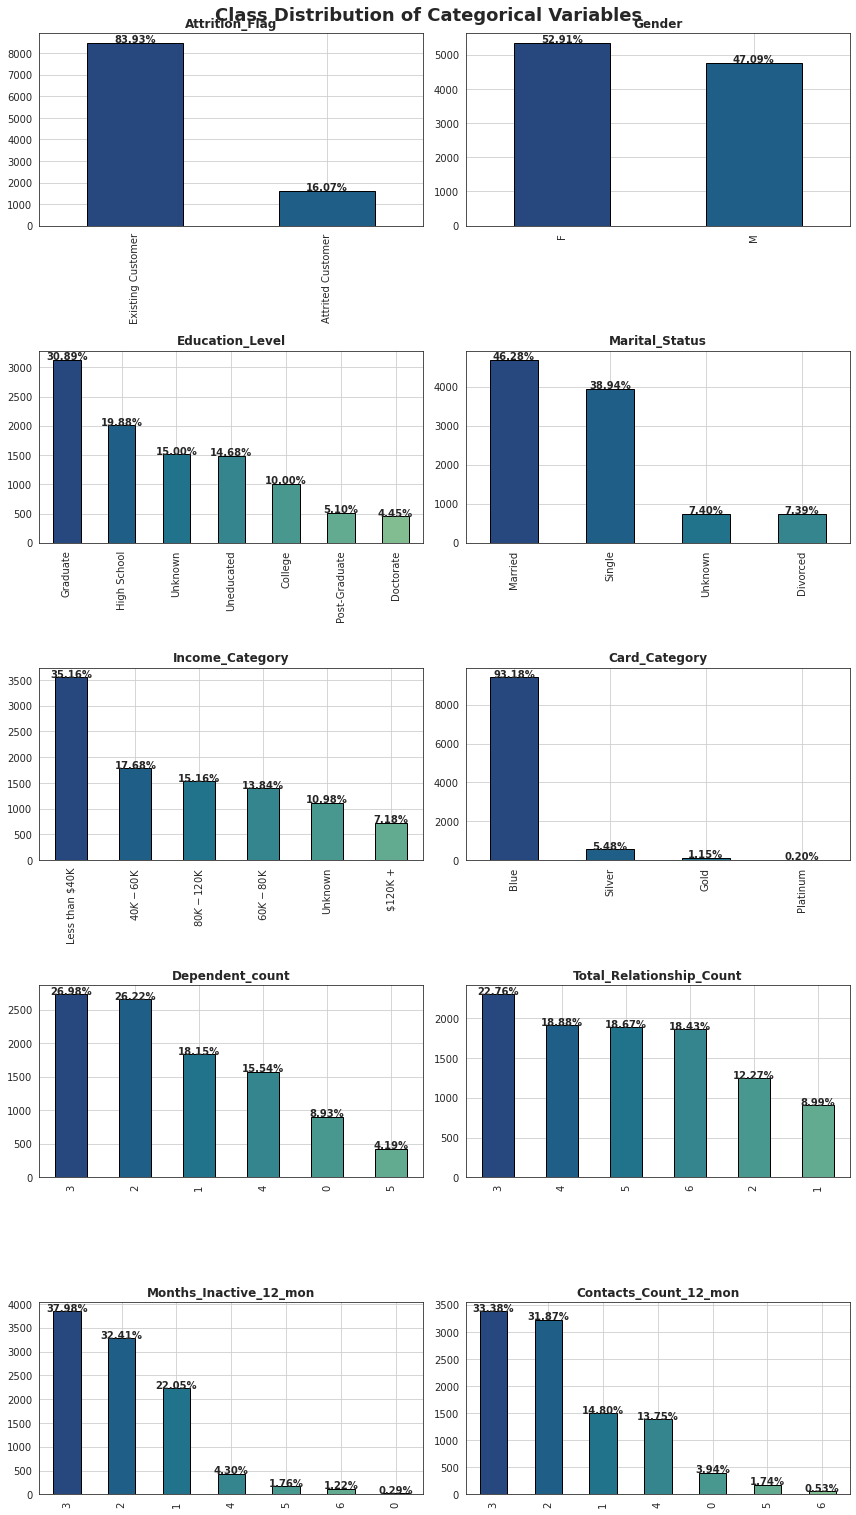

In [45]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12,21), 
                        tight_layout=True)
plt.suptitle("Class Distribution of Categorical Variables", fontsize=18,y=1,fontweight="bold")

colors = sns.color_palette("crest_r", n_colors=7).as_hex()
for feature,ax in zip(categorical,axs.flatten()):
    plot = df[feature].value_counts().plot.bar(edgecolor="black",ax=ax, color=colors)
    ax.set_title(feature,fontweight="bold")
    ax.grid()
    
    
    for bar in plot.patches:
         plot.annotate("{:.2%}".format(bar.get_height() / df[feature].value_counts().sum()),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                        size=10, xytext=(0, 3),
                        textcoords='offset points', fontweight="bold")

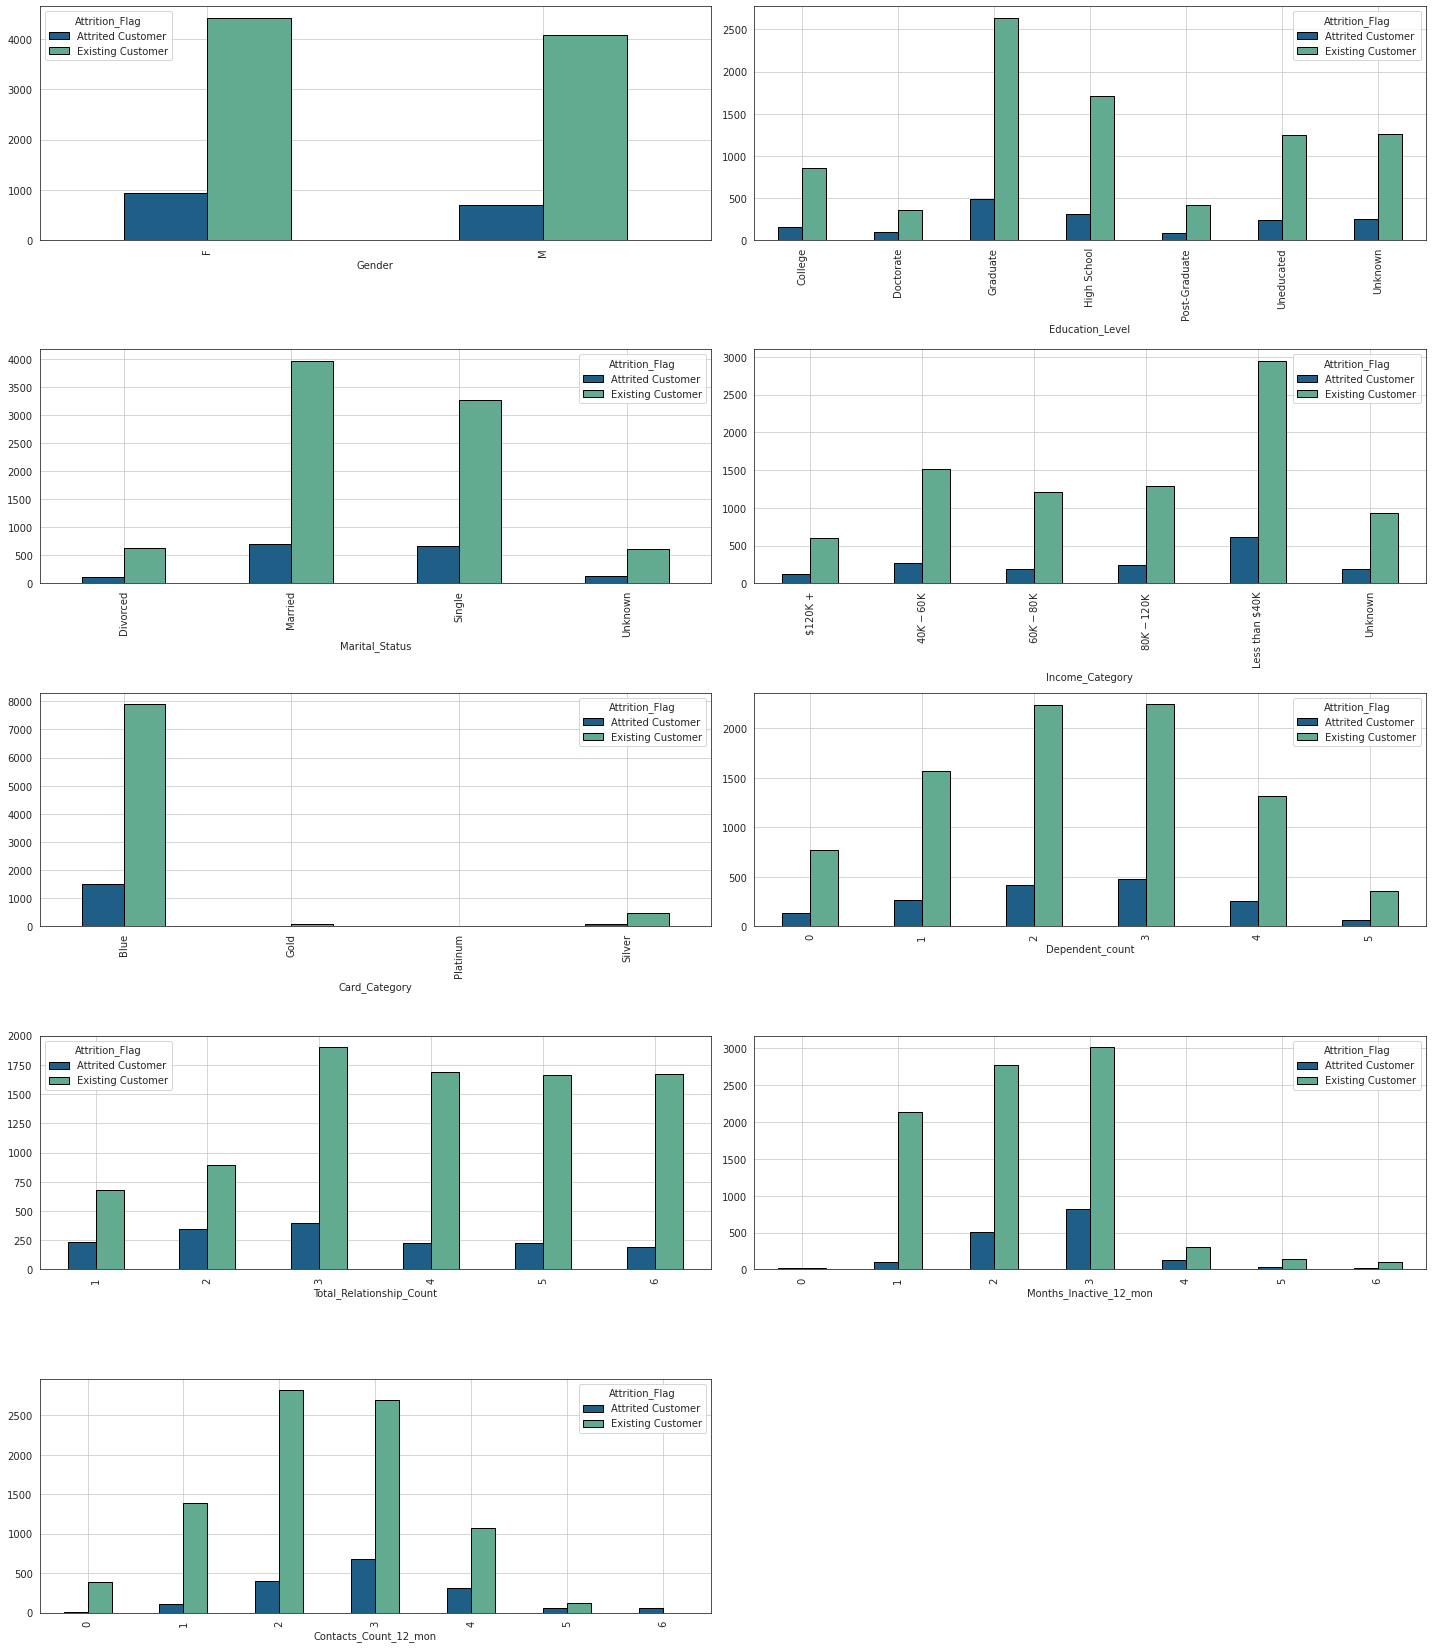

In [15]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20,23), 
                        tight_layout=True)

for feature,ax in zip(categorical[1:],axs.flatten()):

    CrosstabResult=pd.crosstab(index=df[feature],columns=df['Attrition_Flag'])
    CrosstabResult.plot.bar(edgecolor="black",ax=ax, color=[colors[1],colors[5]])
    ax.grid()
fig.delaxes(axs[4][1])  

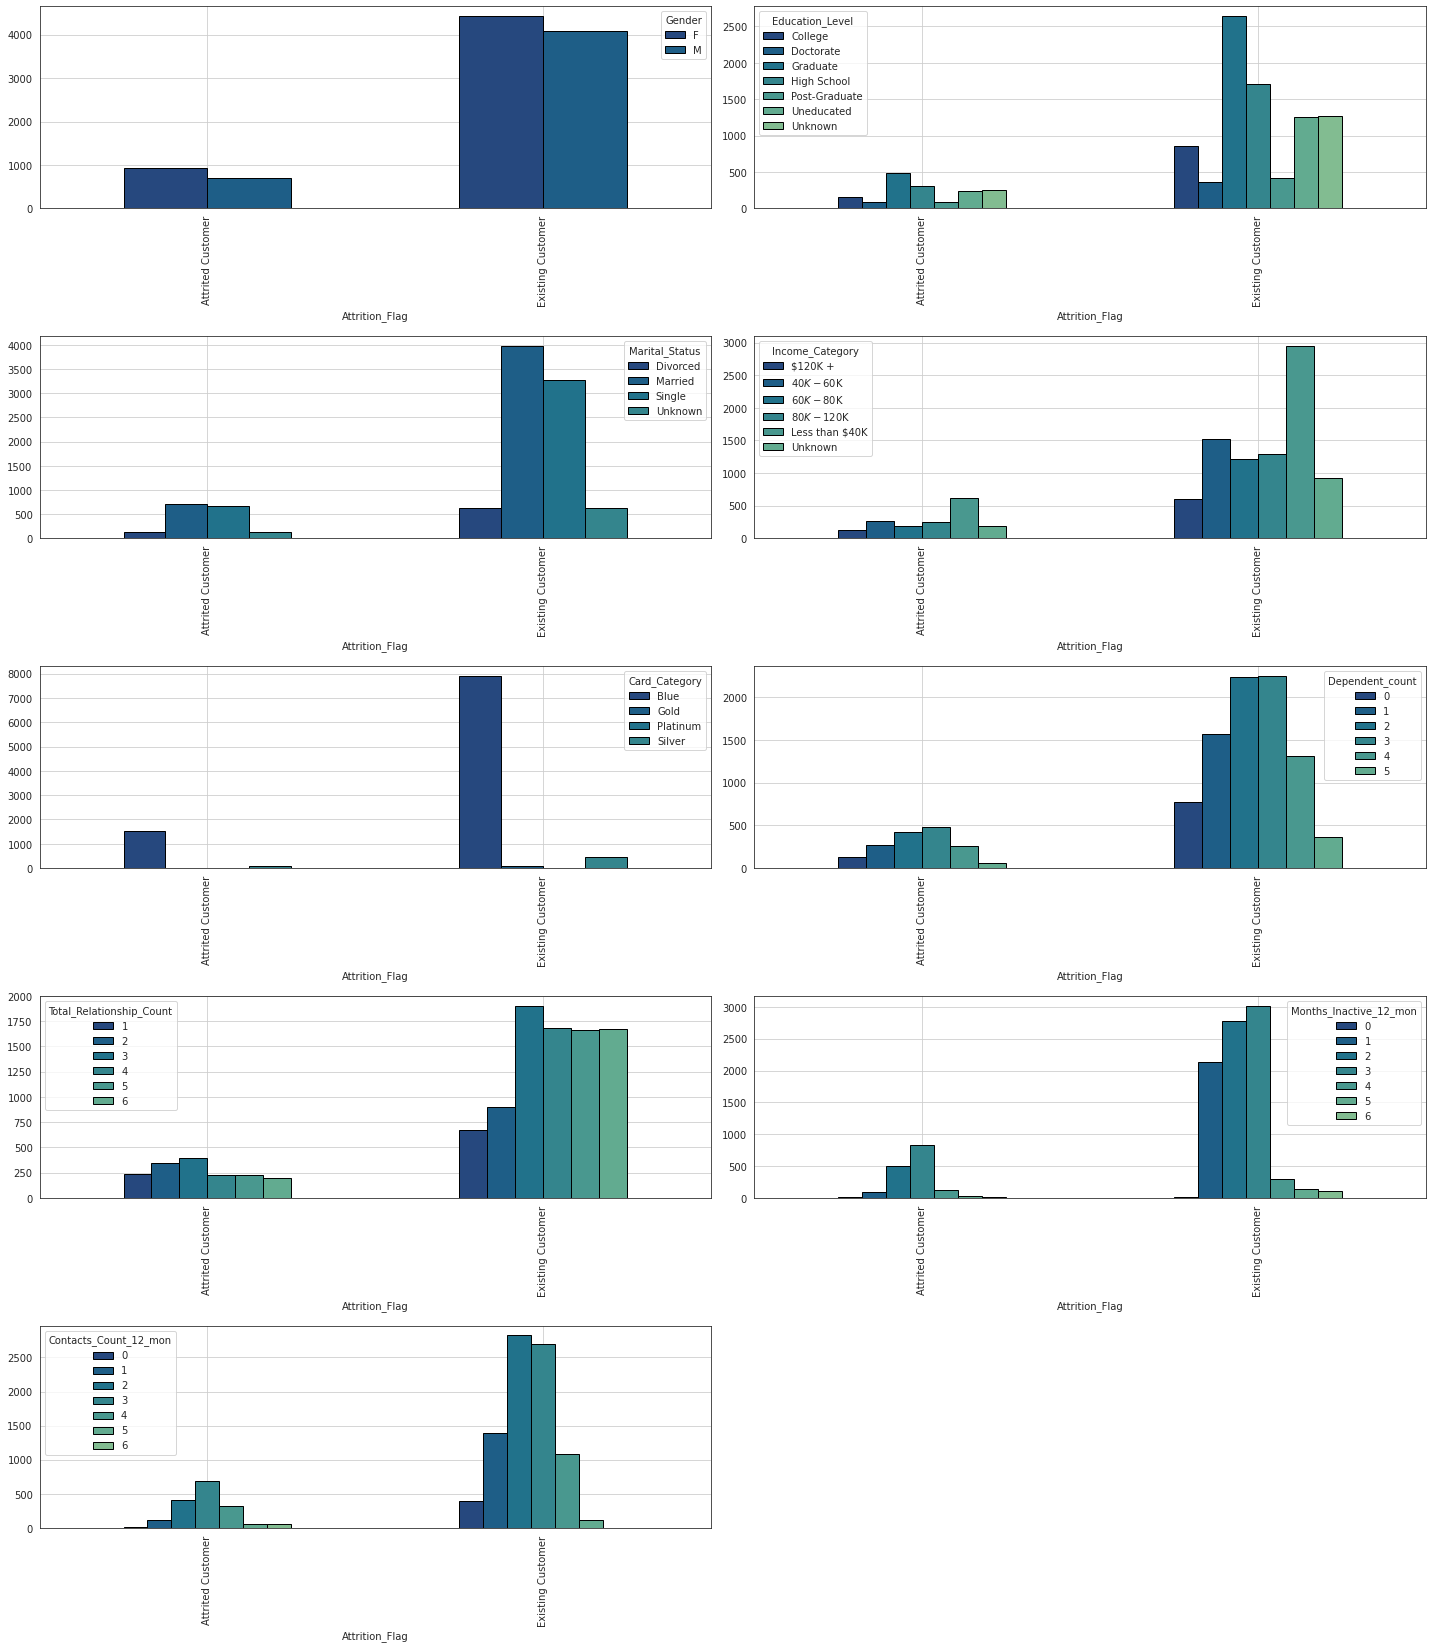

In [16]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20,23), 
                        tight_layout=True)
for feature,ax in zip(categorical[1:],axs.flatten()):
    CrosstabResult=pd.crosstab(index=df["Attrition_Flag"],columns=df[feature])
    CrosstabResult.plot.bar(edgecolor="black",ax=ax, color=colors)
    ax.grid()
fig.delaxes(axs[4][1])

### Numerical Variables Analysis

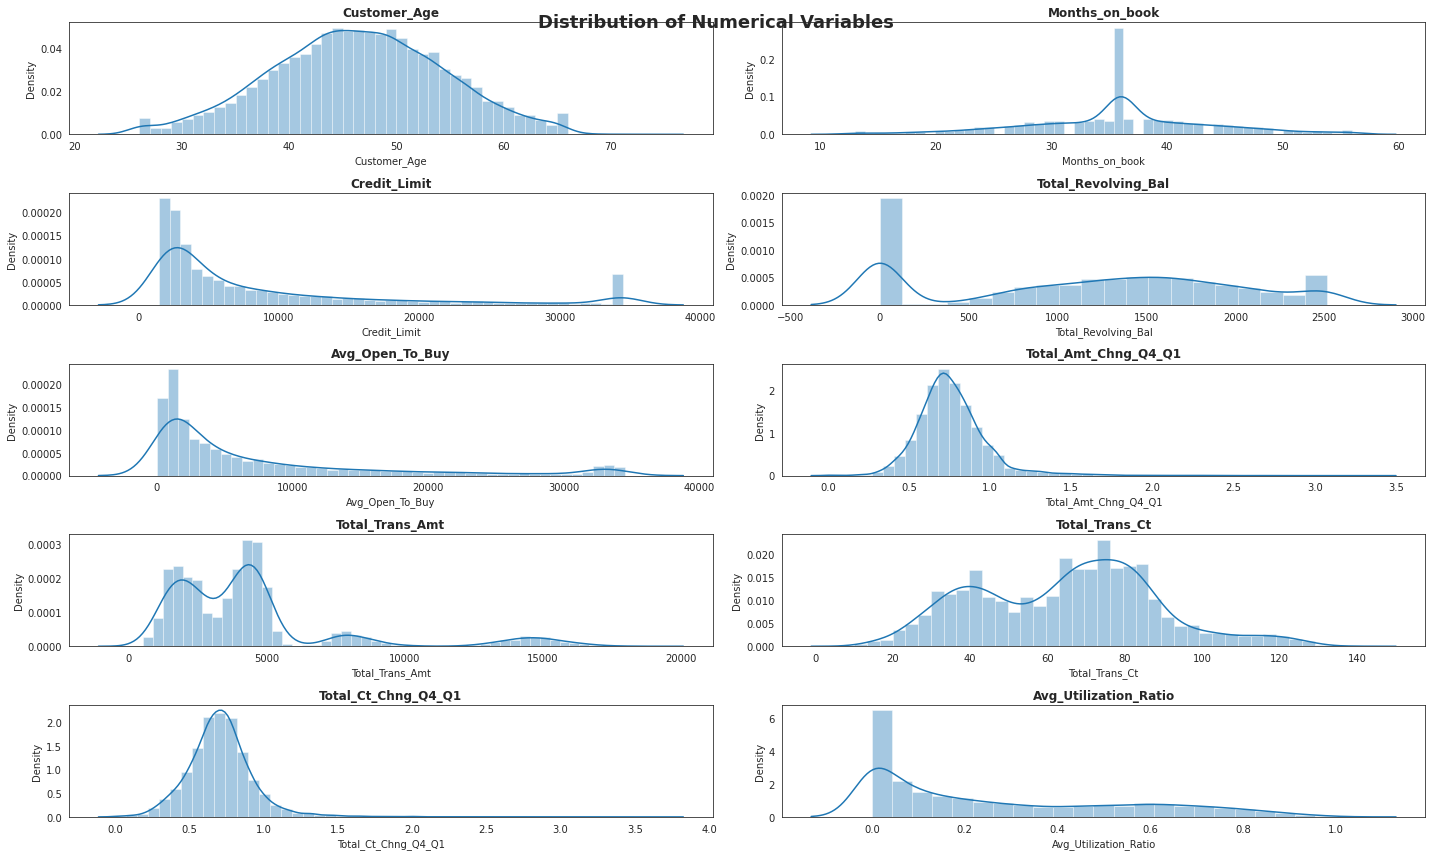

In [17]:
plt.figure(figsize=(20, 12),tight_layout=True)
plt.subplots_adjust(hspace=1)
plt.suptitle("Distribution of Numerical Variables", fontsize=18,fontweight="bold")


for n, feature in enumerate(numerical):
    # add a new subplot iteratively
    ax = plt.subplot(5, 2, n + 1)

    # plot on the new subplot axis
    sns.distplot(df[feature], ax=ax)

    # chart formatting
    ax.set_title(feature,fontweight="bold")

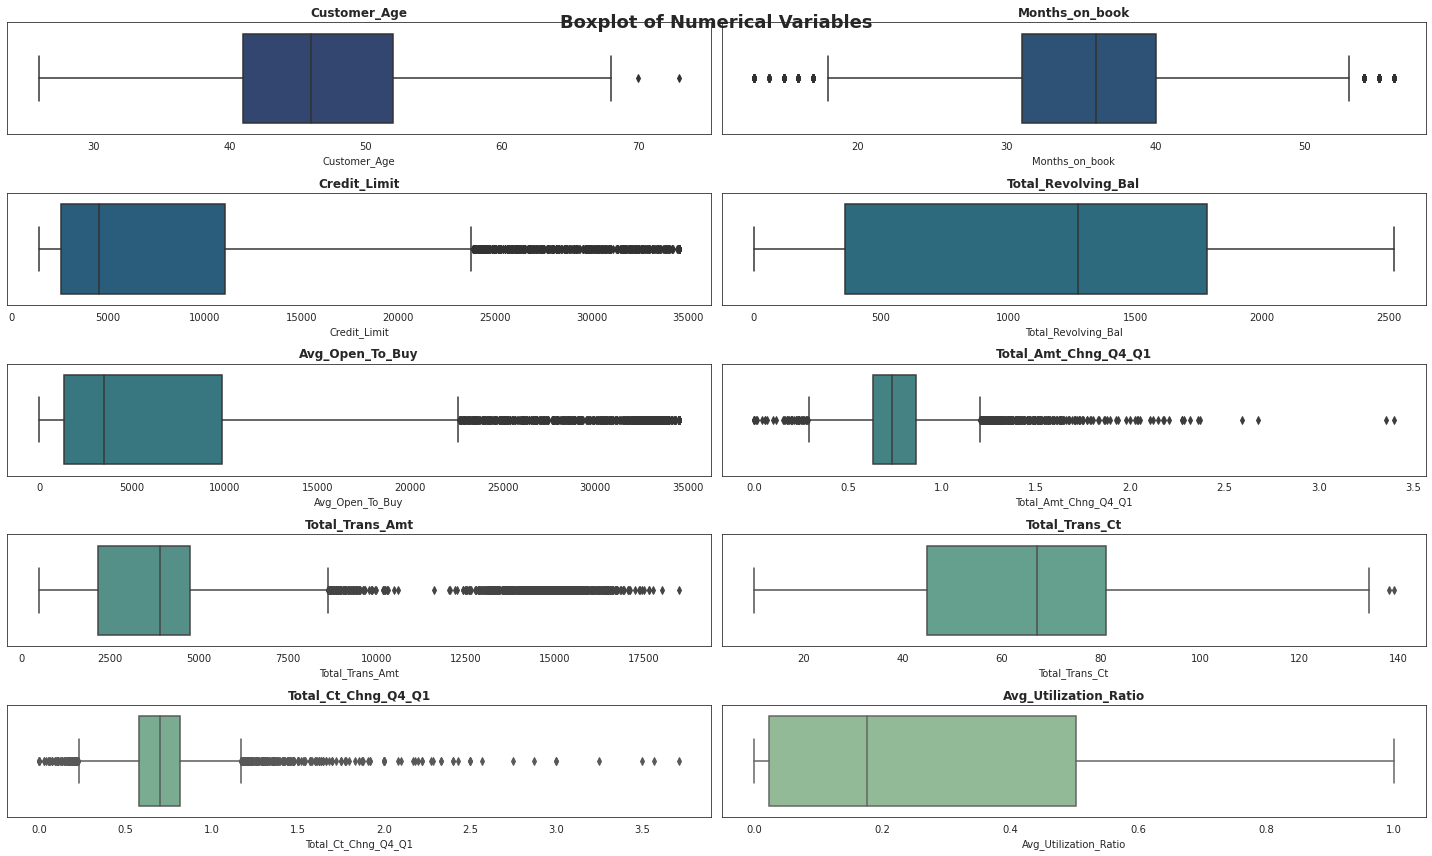

In [18]:
plt.figure(figsize=(20, 12),tight_layout=True)
plt.subplots_adjust(hspace=1)
plt.suptitle("Boxplot of Numerical Variables", fontsize=18,fontweight="bold")

colors = sns.color_palette("crest_r", n_colors=10).as_hex()

for (n, feature),col in zip(enumerate(numerical),colors):
    # add a new subplot iteratively
    ax = plt.subplot(5, 2, n + 1)

    # plot on the new subplot axis
    sns.boxplot(df[feature],ax=ax, color=col)
    # chart formatting
    ax.set_title(feature,fontweight="bold")

Significant Features (p-value < 0.01):
 Total_Revolving_Bal
 Total_Amt_Chng_Q4_Q1
 Total_Trans_Amt
 Total_Trans_Ct
 Total_Ct_Chng_Q4_Q1
 Avg_Utilization_Ratio


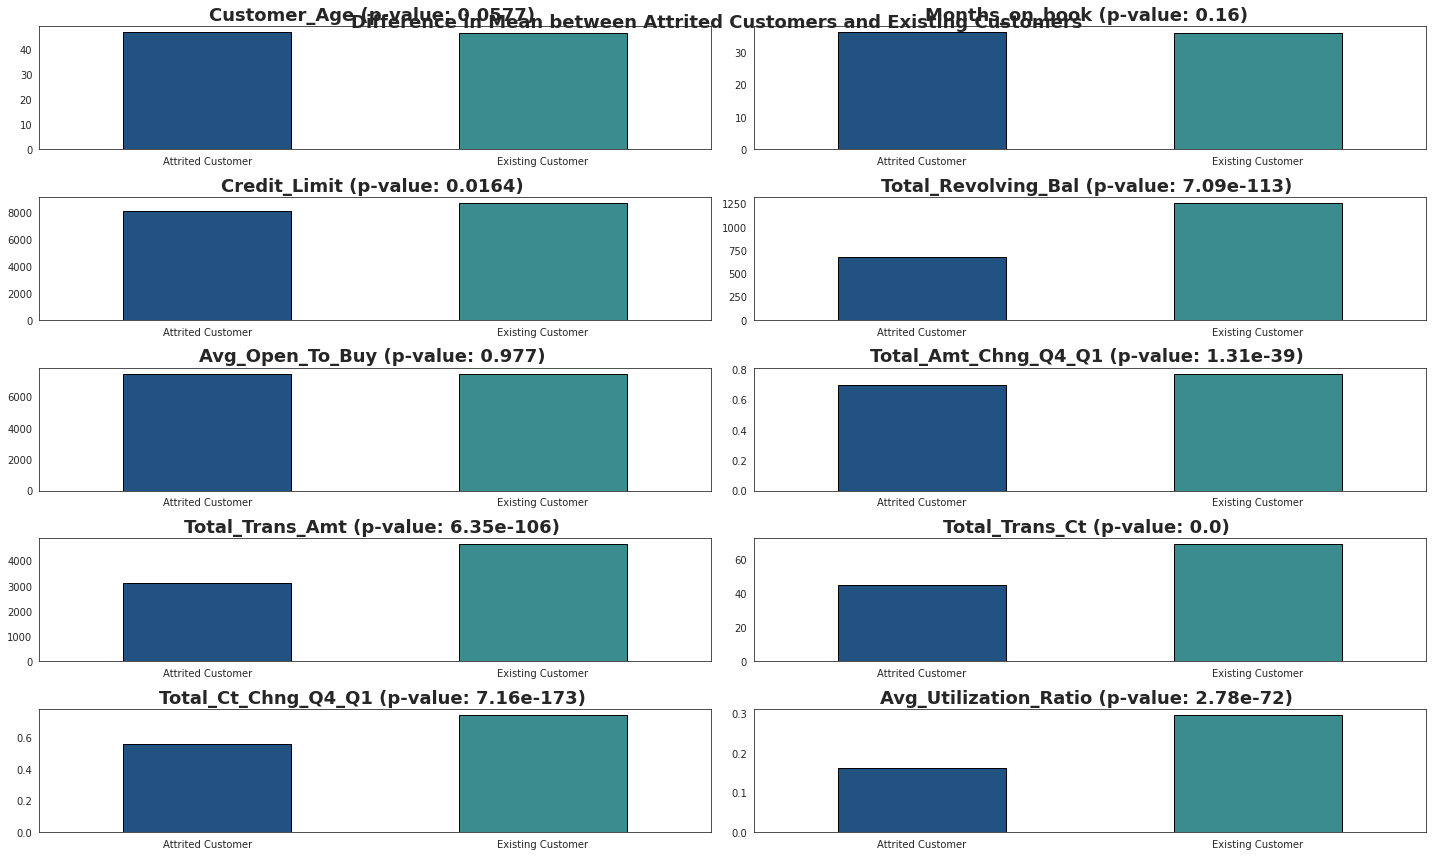

In [19]:
import scipy.stats as stats

existing = df.loc[df.Attrition_Flag=="Existing Customer"]
attrited = df.loc[df.Attrition_Flag=="Attrited Customer"]

plt.figure(figsize=(20, 12),tight_layout=True)
plt.subplots_adjust(hspace=1)
plt.suptitle("Difference in Mean between Attrited Customers and Existing Customers", fontsize=18,fontweight="bold")

significance_level = 0.01
significant_features = []

for n, feature in enumerate(numerical):
    # add a new subplot iteratively
    ax = plt.subplot(5, 2, n + 1)

    # plot on the new subplot axis
    df.groupby("Attrition_Flag",as_index=False).mean()[feature].plot.bar(edgecolor="black",ax=ax, color=[colors[1],colors[5]])
    ax.set_xticklabels(["Attrited Customer","Existing Customer"],rotation=0)
    pval = stats.ttest_ind(a= existing[feature],
                    b= attrited[feature],
                    equal_var=False)[1]
    # chart formatting
    ax.set_title("{} (p-value: {:.3}) ".format(feature,pval),fontweight="bold", fontsize=18)
    if pval < significance_level:
        significant_features.append(feature)
print('\033[1m'+"Significant Features (p-value < {}):".format(significance_level))
for feature in numerical:
    if feature in significant_features:
        print('\033[0m',feature)

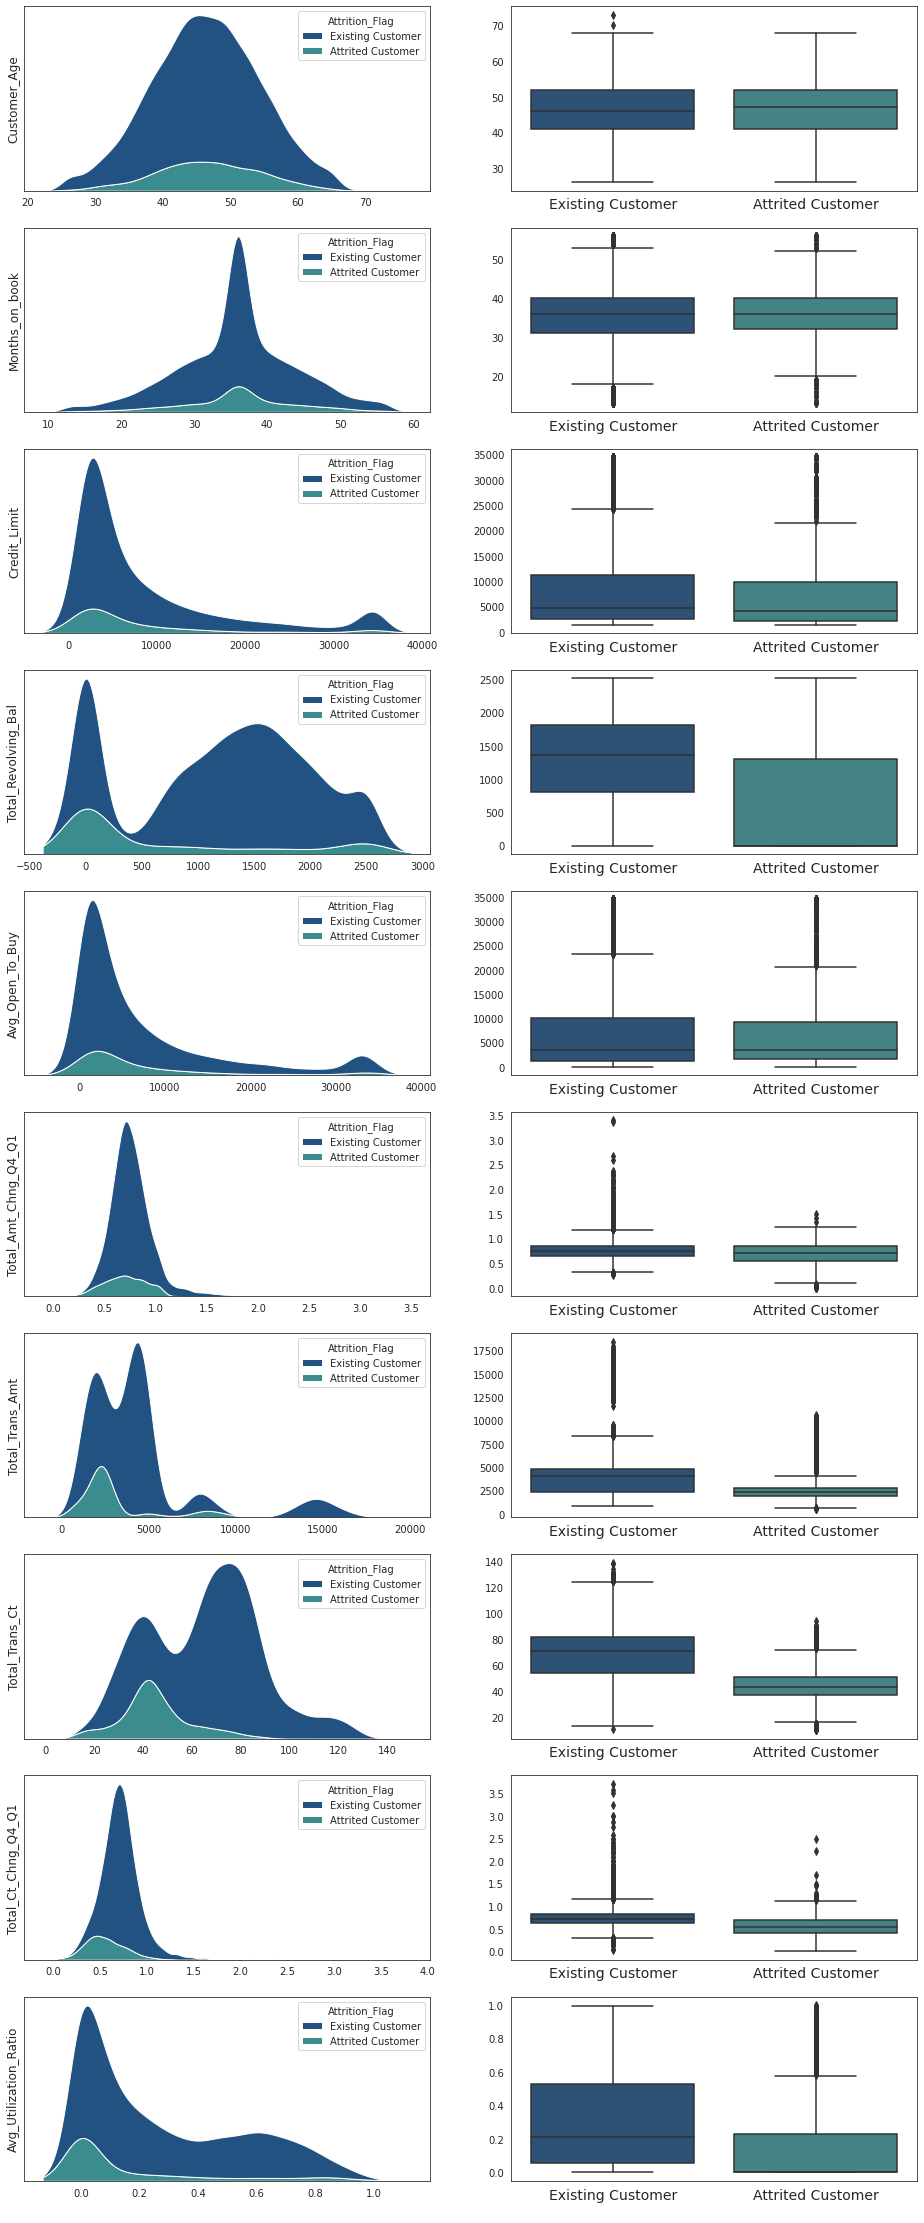

In [20]:
fig, ax = plt.subplots(ncols=2, nrows=10, figsize=(16, 40))
i=0
for cols in numerical:
    
    sns.boxplot(data=df, y=cols, x='Attrition_Flag', ax=ax[i, 1],
               palette=[colors[1],colors[5]], color='white')

    sns.kdeplot(df[cols], fill=True, alpha=1, hue = df['Attrition_Flag'], 
                palette=[colors[1],colors[5]], multiple='stack', ax=ax[i,0])

    ax[i,0].set_xlabel(' ')
    ax[i,1].set_xlabel(' ')
    ax[i,1].set_ylabel(' ')
    ax[i,1].xaxis.set_tick_params(labelsize=14)
    ax[i,0].tick_params(left=False, labelleft=False)
    ax[i,0].set_ylabel(cols, fontsize=12)
    
    i=i+1

In [21]:
#sns.pairplot(df, hue='Attrition_Flag')

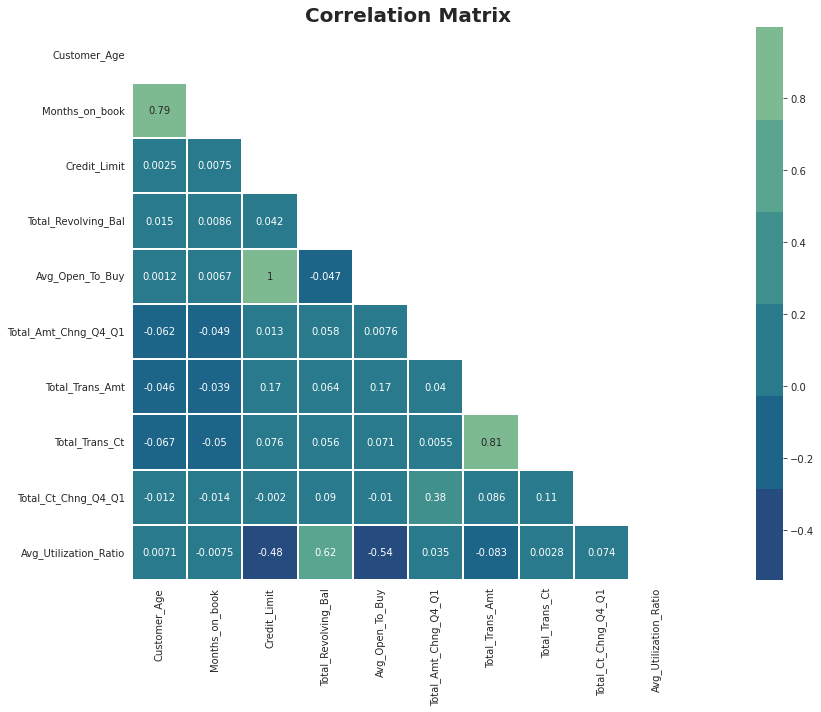

In [22]:
corr = df[numerical].corr()
colors = sns.color_palette("crest_r").as_hex()
plt.figure(figsize=(20,10))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax=sns.heatmap(df[numerical].corr(), square=True, annot=True, mask=mask, cmap=colors, linewidths=1, linecolor="white")
ax.set_title("Correlation Matrix",fontsize=20,fontweight="bold")
plt.tight_layout()

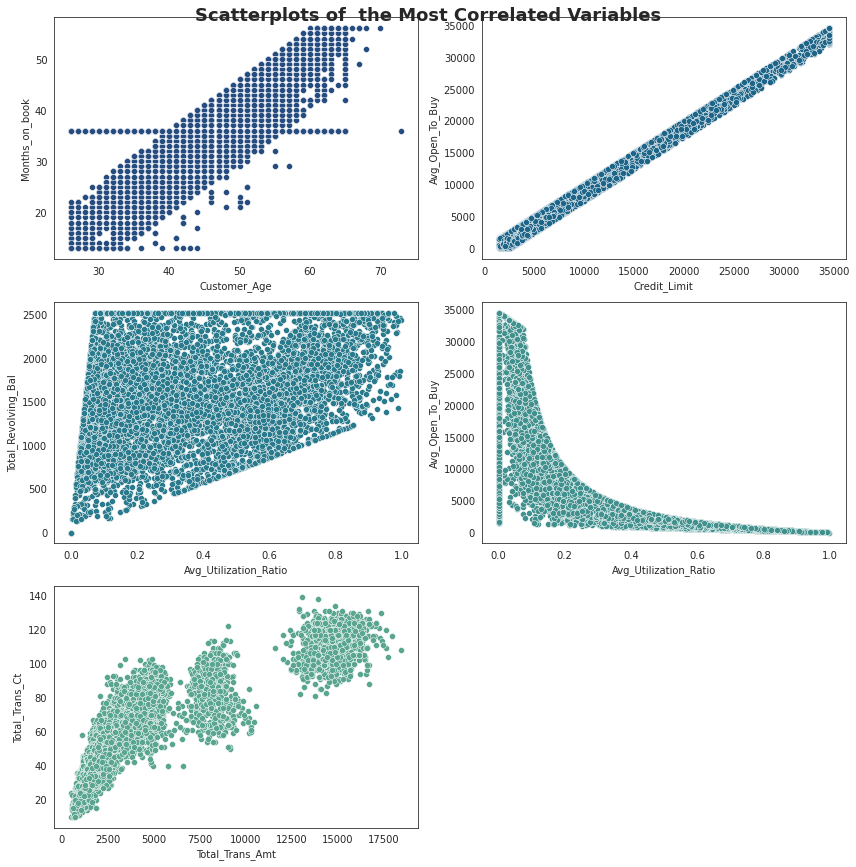

In [23]:
plt.figure(figsize=(12, 12),tight_layout=True)
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.suptitle("Scatterplots of  the Most Correlated Variables", fontsize=18, y=1,fontweight="bold")


ax = plt.subplot(3,2,1)
sns.scatterplot(df.Customer_Age,df.Months_on_book,color=colors[0])

ax = plt.subplot(3,2,2)
sns.scatterplot(df.Credit_Limit,df.Avg_Open_To_Buy,color=colors[1])
    
ax = plt.subplot(3,2,3)
sns.scatterplot(df.Avg_Utilization_Ratio,df.Total_Revolving_Bal,color=colors[2])

ax = plt.subplot(3,2,4)
sns.scatterplot(df.Avg_Utilization_Ratio,df.Avg_Open_To_Buy,color=colors[3])

ax = plt.subplot(3,2,5)
sns.scatterplot(df.Total_Trans_Amt,df.Total_Trans_Ct,color=colors[4])

### Exploring Missing Values

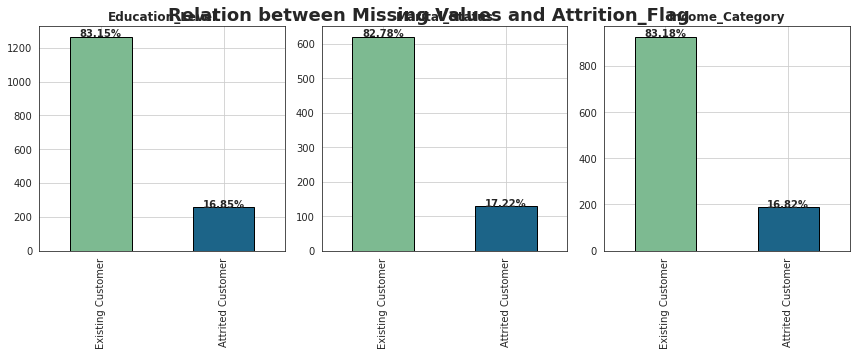

In [24]:
features_missing = ["Education_Level","Marital_Status","Income_Category"]
plt.figure(figsize=(12, 5),tight_layout=True)
plt.subplots_adjust(hspace=1)
plt.suptitle("Relation between Missing Values and Attrition_Flag", fontsize=18,fontweight="bold")
for n,feature in enumerate(features_missing):
    ax = plt.subplot(1, 3, n + 1)
    df[df[feature] == "Unknown"]["Attrition_Flag"].value_counts().plot(kind="bar",ax=ax, color=[colors[5],colors[1]],edgecolor="black")
    ax.grid()
    ax.set_title(feature,fontweight="bold")
    for bar in ax.patches:
         ax.annotate("{:.2%}".format(bar.get_height() / df[df[feature] == "Unknown"]["Attrition_Flag"].value_counts().sum()),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                        size=10, xytext=(0, 3),
                        textcoords='offset points', fontweight="bold")

In [25]:
#percentage of attrited customers that we are going to lose if we just drop the missing values
attrited = df.Attrition_Flag.value_counts()[1]
missing_attrited = 0
for feature in features_missing:
    value = df[df[feature] == "Unknown"]["Attrition_Flag"].value_counts()[1]
    missing_attrited += value
print("{:.2%}".format(missing_attrited / attrited)) 

35.16%


## Data Preprocessing

In [26]:
data = df.copy()
data = data[data.Education_Level != "Unknown"] 
data = data[data.Marital_Status != "Unknown"] 
data = data[data.Income_Category != "Unknown"] 
data.reset_index(drop=True, inplace=True)
data.shape

(7081, 20)

### Label Encoding

In [27]:
data["Attrition_Flag"] = data["Attrition_Flag"].replace({'Existing Customer':0, 'Attrited Customer':1})
data["Gender"] = data["Gender"].replace({'M':0, 'F':1})
data['Education_Level']= data['Education_Level'].replace({'Uneducated':0, 'High School':1, 'College':2, 'Graduate':3,'Post-Graduate':4, 'Doctorate':5})
data['Income_Category']= data['Income_Category'].replace({'Less than $40K':0, '$40K - $60K':1, '$60K - $80K':2, '$80K - $120K':3, '$120K +':4})
data['Card_Category']= data['Card_Category'].replace({'Blue':0, 'Silver':1, 'Gold':2, 'Platinum':3})

In [28]:
data["Marital_Status"] = data["Marital_Status"].map({"Single":0, "Married":1, "Divorced":2})

In [29]:
#dummy_cols = pd.get_dummies(data["Marital_Status"], prefix="Marital_Status", drop_first=True)
#data = pd.concat([data,dummy_cols],axis=1)
#data.drop(columns="Marital_Status", inplace=True) 

In [30]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,1,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,1,5,3,0,0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,0,3,3,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,0,3,0,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
4,0,44,0,2,3,1,1,0,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311


### Correlation Matrix

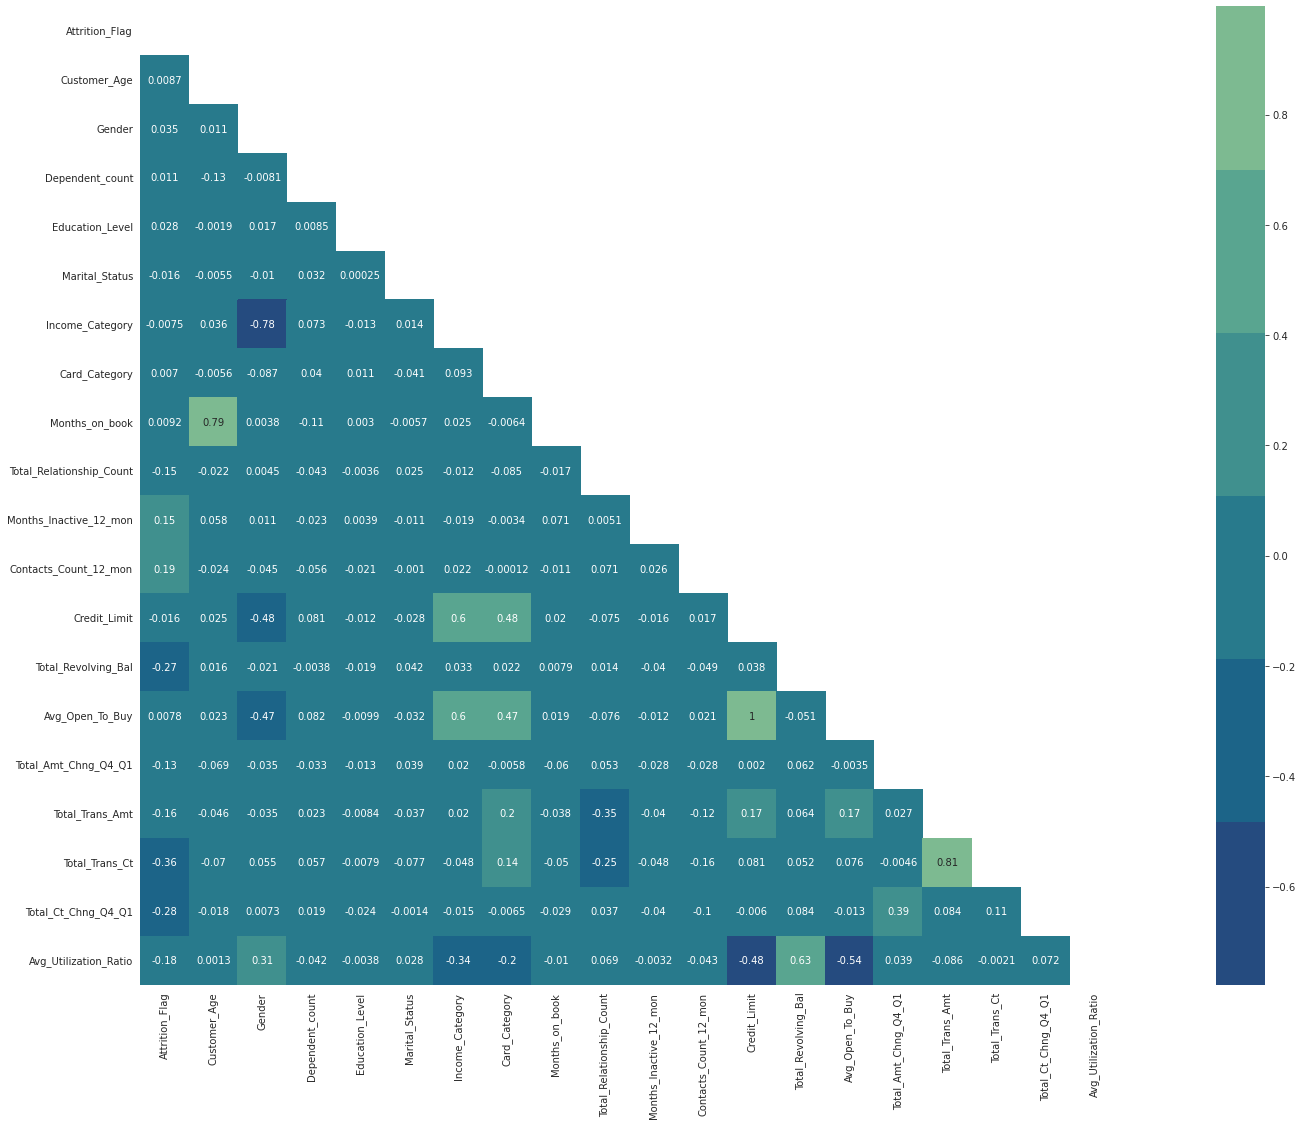

In [31]:
corr = data.corr()

plt.figure(figsize=(35,18))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, square=True, annot=True, mask=mask, cmap=colors, linecolor="white")

In [32]:
data.drop('Avg_Open_To_Buy', axis=1, inplace=True)
numerical.remove('Avg_Open_To_Buy') #because it's highly correlated with Credit_Limit 

## Model Building

In [33]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve,roc_auc_score,classification_report,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


def sampling_and_model(df,model,method,scaled,plot):
    X = df.drop("Attrition_Flag", axis=1)
    y = df.Attrition_Flag
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
    
    if method=="undersampling":
        under = RandomUnderSampler(random_state=42)
        X_train,y_train = under.fit_resample(X_train,y_train)
        
    if method=="smote":
        over = SMOTE(random_state=42)
        X_train, y_train = over.fit_resample(X_train, y_train)
        
    if method=="both":
        over = SMOTE(random_state=42,sampling_strategy=0.7)
        under = RandomUnderSampler(random_state=42,sampling_strategy=0.7)
        X_train, y_train = over.fit_resample(X_train, y_train)    
        X_train, y_train = under.fit_resample(X_train, y_train)
        
    if scaled==True:
        scaler = MinMaxScaler()
        model.fit(scaler.fit_transform(X_train),y_train)
        y_pred = model.predict(scaler.transform(X_test))
        prob = model.predict_proba(scaler.transform(X_test))[:,1]
        fpr, tpr, _ = roc_curve(y_test,prob)
    else:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        prob = model.predict_proba(X_test)[:,1]
        fpr, tpr, treshold = roc_curve(y_test,prob)
        
        
    print(classification_report(y_test,y_pred))
    roc = roc_auc_score(y_test,prob)
    
    if plot==True:
        plt.figure(figsize=(12, 5),tight_layout=True)
        plt.subplots_adjust(hspace=0.5,wspace=0.5)
        plt.suptitle("Model Evaluation", fontsize=18, y=1,fontweight="bold")
    
        ax = plt.subplot(1,2,1)
        conf_matrix=confusion_matrix(y_test, y_pred)
        ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
        for i in range(conf_matrix.shape[0]):
            for j in range(conf_matrix.shape[1]):
                ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
        ax.set_xlabel('Predictions', fontsize=18)
        ax.set_ylabel('Actuals', fontsize=18)
        ax.set_title('Confusion Matrix', fontsize=18)
    
        ax = plt.subplot(1,2,2)
        ax.plot([0,1],[0,1],"b--",label="Random Prediction (AUC = {0:.3g})".format(0.5))
        ax.plot(fpr,tpr,"g",label="Model (AUC = {0:.3g})".format(roc_auc_score(y_test,prob)))
        ax.set_title("ROC Curve", fontsize=18)
        ax.set_xlabel("False Positive Rate")
        ax.set_ylabel("True Positive Rate")
        ax.legend()
    return round(roc,4)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

logistic = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC(probability=True)
tree = DecisionTreeClassifier(random_state=42)
forest = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

models = [logistic,knn,svm,tree,forest,xgb]
names = ["Logistic Regression","K-Nearest Neighbor","Support Vector Machines","Decision Tree","Random Forest","XGBoost"]
need_scaling = [logistic,knn,svm]

In [35]:
roc_smote = []
for model,name in zip(models,names):
    print('\033[1m'+ name+'\033[0m')
    if model in need_scaling:
        roc = sampling_and_model(data,model,method="smote",scaled=True,plot=False)
    else:
        roc = sampling_and_model(data,model,method="smote",scaled=False,plot=False)
    print("AUC Score: ",roc)
    roc_smote.append(roc)
    print("-------------------------------------------------------------------------------------------------")

Logistic Regression
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1791
           1       0.51      0.73      0.60       334

    accuracy                           0.85      2125
   macro avg       0.72      0.80      0.75      2125
weighted avg       0.88      0.85      0.86      2125

AUC Score:  0.883
-------------------------------------------------------------------------------------------------
K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1791
           1       0.44      0.72      0.54       334

    accuracy                           0.81      2125
   macro avg       0.69      0.77      0.71      2125
weighted avg       0.86      0.81      0.83      2125

AUC Score:  0.836
-------------------------------------------------------------------------------------------------
Support Vector Machines
              precision    recall  f1-score   suppo

In [36]:
roc_under = []
for model,name in zip(models,names):
    print('\033[1m'+ name+'\033[0m')
    if model in need_scaling:
        roc = sampling_and_model(data,model,method="undersampling",scaled=True,plot=False)
    else:
        roc = sampling_and_model(data,model,method="undersampling",scaled=False,plot=False)
    print("AUC Score: ",roc)
    roc_under.append(roc)
    print("-------------------------------------------------------------------------------------------------")

Logistic Regression
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1791
           1       0.47      0.80      0.59       334

    accuracy                           0.83      2125
   macro avg       0.71      0.81      0.74      2125
weighted avg       0.88      0.83      0.84      2125

AUC Score:  0.9002
-------------------------------------------------------------------------------------------------
K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      1791
           1       0.42      0.77      0.54       334

    accuracy                           0.80      2125
   macro avg       0.68      0.78      0.71      2125
weighted avg       0.87      0.80      0.82      2125

AUC Score:  0.8408
-------------------------------------------------------------------------------------------------
Support Vector Machines
              precision    recall  f1-score   sup

In [37]:
roc_both = []
for model,name in zip(models,names):
    print('\033[1m'+ name+'\033[0m')
    if model in need_scaling:
        roc = sampling_and_model(data,model,method="both",scaled=True,plot=False)
    else:
        roc = sampling_and_model(data,model,method="both",scaled=False,plot=False)
    print("AUC Score: ",roc)
    roc_both.append(roc)
    print("-------------------------------------------------------------------------------------------------")

Logistic Regression
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      1791
           1       0.55      0.69      0.61       334

    accuracy                           0.86      2125
   macro avg       0.74      0.79      0.76      2125
weighted avg       0.88      0.86      0.87      2125

AUC Score:  0.8863
-------------------------------------------------------------------------------------------------
K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1791
           1       0.47      0.69      0.56       334

    accuracy                           0.83      2125
   macro avg       0.70      0.77      0.73      2125
weighted avg       0.86      0.83      0.84      2125

AUC Score:  0.8409
-------------------------------------------------------------------------------------------------
Support Vector Machines
              precision    recall  f1-score   sup

In [38]:
auc_scores = np.array([roc_smote,
                   roc_under,
                   roc_both])
methods = ["SMOTE","UnderSampling","Both"]
scoredf = pd.DataFrame(auc_scores, columns=names,index=methods).T
scoredf["Best_Method"] = scoredf.idxmax(axis=1)
scoredf

,SMOTE,UnderSampling,Both,Best_Method
Logistic Regression,0.8830,0.9002,0.8863,UnderSampling
K-Nearest Neighbor,0.8360,0.8408,0.8409,Both
Support Vector Machines,0.9291,0.9227,0.9342,Both
Decision Tree,0.8903,0.8800,0.8795,SMOTE
Random Forest,0.9857,0.9776,0.9854,SMOTE
XGBoost,0.9852,0.9824,0.9857,Both


### The Two Best Models

Random Forest
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1791
           1       0.84      0.86      0.85       334

    accuracy                           0.95      2125
   macro avg       0.91      0.92      0.91      2125
weighted avg       0.95      0.95      0.95      2125

AUC Score:  0.9857


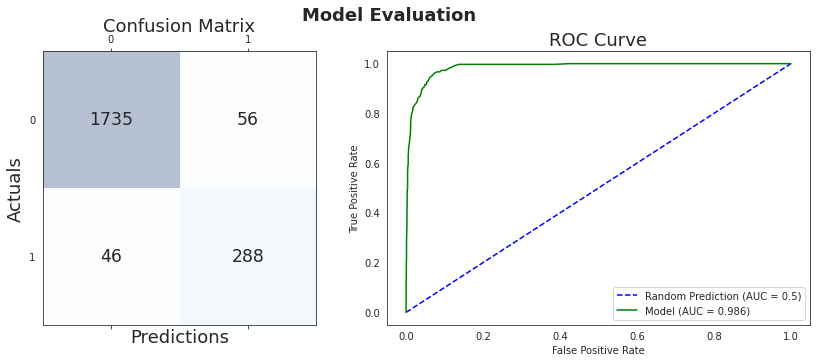

In [39]:
print('\033[1m'+'Random Forest'+'\033[0m')
roc = sampling_and_model(data,forest,method="smote",scaled=False,plot=True)
print("AUC Score: ",roc)

XGBoost
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1791
           1       0.78      0.92      0.84       334

    accuracy                           0.95      2125
   macro avg       0.88      0.93      0.91      2125
weighted avg       0.95      0.95      0.95      2125

AUC Score:  0.9852


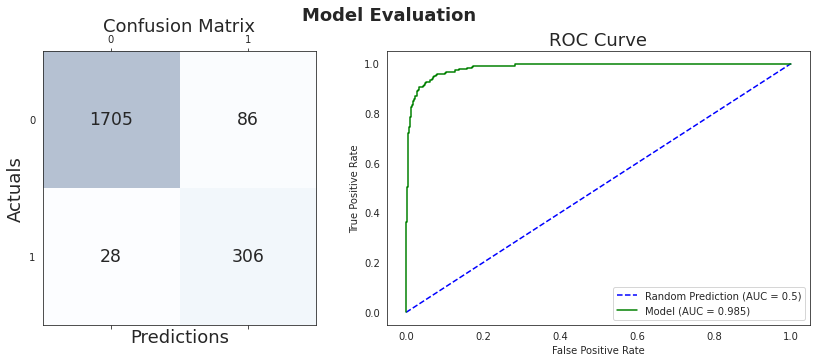

In [40]:
print('\033[1m'+'XGBoost'+'\033[0m')
roc = sampling_and_model(data,xgb,method="smote",scaled=False,plot=True)
print("AUC Score: ",roc)

### Neural Network

In [41]:
X = data.drop("Attrition_Flag", axis=1)
y = data.Attrition_Flag
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

In [42]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
import tensorflow as tf
import keras

tf.random.set_seed(42)

model = keras.Sequential([
    keras.layers.Dense(12, activation = keras.activations.relu),
    keras.layers.Dense(6, activation = keras.activations.relu),
    keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy','AUC'])

history = model.fit(X_train, y_train, epochs=400, batch_size=128, validation_data=(X_test, y_test), verbose=0)

KeyboardInterrupt: ignored

In [ ]:
loss, accuracy, auc = model.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.3f}%")
print(f"Model AUC on the test set: {auc:.3f}")

In [ ]:
plt.figure(figsize=(12, 5),tight_layout=True)

ax = plt.subplot(1, 2, 1)
pd.DataFrame(history.history)[['auc','val_auc']].plot(ax=ax)
ax.set_title('AUC Score on Train and Test Set')
ax.grid()

ax = plt.subplot(1, 2, 2)
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot(ax=ax)
ax.set_title('Accuracy Score on Train and Test Set')

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

y_pred=model.predict(X_test)>0.5
print(classification_report(y_test,y_pred))

plt.figure(figsize=(12, 5),tight_layout=True)
plt.subplots_adjust(hspace=0.5,wspace=0.5)
ax = plt.subplot()
conf_matrix=confusion_matrix(y_test, y_pred)
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
    ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
ax.set_xlabel('Predictions', fontsize=18)
ax.set_ylabel('Actuals', fontsize=18)
ax.set_title('Confusion Matrix', fontsize=18)

## Clustering and Cluster Analysis

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/MyDrive/1-UniVE/Laurea Magistrale - Data Analytics for Business and Society/Data Analytics and Artificial Intelligence/Project

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,  confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
cldata = pd.read_csv("encoded.csv")
# cldata = cldata.drop(["Attrition_Flag"], axis = 1)
cldata.head()

In [ ]:
cldata = data.copy()
cldata

### 2 Clusters

In [ ]:
preprocessor = Pipeline([("scaler", MinMaxScaler()), ("pca", PCA(n_components=2, random_state=1))]) #PCA n_components=2 projects the data into 2 dimensions so we can plot it later

clusterer = Pipeline([("kmeans", KMeans(n_clusters= 2, init="k-means++", n_init=50, max_iter=300, random_state=1))])

pipe = Pipeline([("preprocessor", preprocessor),("clusterer", clusterer)])


pipe.fit(cldata)


preprocessed_data = pipe["preprocessor"].transform(cldata)

predicted_labels = pipe["clusterer"]["kmeans"].labels_

print('Silhouette Score: ', silhouette_score(preprocessed_data, predicted_labels))

In [ ]:
pcadf = pd.DataFrame(
        pipe["preprocessor"].transform(cldata),
        columns=["component_1", "component_2"]
    )

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_+1

In [ ]:
plt.figure(figsize=(12, 7),tight_layout=True)
sp = sns.scatterplot(
        x="component_1",
        y="component_2",
        s=50,
        data=pcadf,
        hue="predicted_cluster"
    )
   
sp.set_title("Clustering Results from Credit Card Use",fontsize=18,fontweight="bold")
plt.legend(bbox_to_anchor=(1, 1))

In [ ]:
cldata["Clusters"] = pipe['clusterer']['kmeans'].labels_+1
cldata.head()

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
colors = sns.color_palette("crest_r", n_colors=7).as_hex()
labels = sorted(cldata['Clusters'].unique())
# Capture each of the return elements.
patches, texts, pcts = ax.pie(
    cldata['Clusters'].value_counts().sort_index(),labels=labels,colors=colors, autopct='%.0f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'})
# Style just the percent values.
plt.setp(pcts, color='white', fontweight='bold')
ax.set_title('Cluster Composition', fontsize=18)
plt.tight_layout()


In [ ]:
fig, axs = plt.subplots(ncols=2,nrows=1, figsize=(10,3), tight_layout=True)
plt.subplots_adjust(hspace=0.5)

labels = ["Attrited Customer","Existing Customer"]
clusters = sorted(cldata.Clusters.unique())
for k,ax,col in zip(clusters,axs.flatten(),colors):
    cldata[cldata['Clusters'] == k]['Attrition_Flag'].value_counts().plot.barh(ax=ax,edgecolor="black", title='Cluster {}'.format(k),color=col)
#next lines of code are needed to solve problem with labels: if there is only a type of customer, the label was always 
#Existing Customer and so in Clusters 3,4 wasn't correct
    if len(cldata[cldata['Clusters'] == k]['Attrition_Flag'].value_counts())==1:
        if cldata[cldata['Clusters'] == k]['Attrition_Flag'].value_counts().index==1:
            labels.reverse()
            ax.set_yticks([1,0])
            ax.set_yticklabels(labels)
            labels.reverse()
        else:
            ax.set_yticks([1,0])
            ax.set_yticklabels(labels)  
    else:
        ax.set_yticks([1,0])
        ax.set_yticklabels(labels)  

We tried to see if we create 2 clusters it would divide the groups of Attrited customers and the existing customers but it doesn't seem the case.


In [ ]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(cldata), columns=cldata.columns)
scaled_df['Clusters'] = pipe['clusterer']['kmeans'].labels_+1
scaled_df.head()

In [ ]:
with plt.style.context("fivethirtyeight"):
    fix, axs = plt.subplots(ncols=2,nrows=1, figsize=(25,10), tight_layout=True)
    scaled_df[scaled_df['Clusters'] == 1][numerical].mean().plot.barh(ax=axs[0], xlim=(-1.5, 3), figsize=(15,4), sharey=True, title='Group 1',color=colors[0],edgecolor="black")
    scaled_df[scaled_df['Clusters'] == 2][numerical].mean().plot.barh(ax=axs[1], xlim=(-1.5, 3), figsize=(15,4), sharey=True, title='Group 2',color=colors[1],edgecolor="black")

In [ ]:
with plt.style.context("fivethirtyeight"):
    fix, axs = plt.subplots(ncols=2,nrows=1, figsize=(15,10), tight_layout=True)
    scaled_df[scaled_df['Clusters'] == 1][categorical].mean().plot.barh(ax=axs[0], xlim=(-1.5, 3), figsize=(15,3), sharey=True, title='Group 1',color=colors[0],edgecolor="black")
    scaled_df[scaled_df['Clusters'] == 2][categorical].mean().plot.barh(ax=axs[1], xlim=(-1.5, 3), figsize=(15,3), sharey=True, title='Group 2',color=colors[1],edgecolor="black")


### Elbow Method

In [ ]:
# cldata = data.copy()
wcss = []

for i in range(2,25):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
    data_clusters = StandardScaler().fit_transform(cldata)
    km.fit(data_clusters)
    wcss.append(km.inertia_)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5),tight_layout=True)
ax.plot(range(2,25), wcss,'-b.')
ax.set_title('Elbow Method',fontsize=18,fontweight="bold")
ax.set_xlabel('K Clusters')
ax.set_ylabel('Within-cluster Sums of Squares')
ax.grid()

In [ ]:
cldata = pd.read_csv("encoded.csv")

In [ ]:
preprocessor = Pipeline([("scaler", MinMaxScaler()), ("pca", PCA(n_components=2, random_state=1))]) #PCA n_components=2 projects the data into 2 dimensions so we can plot it later

clusterer = Pipeline([("kmeans", KMeans(n_clusters= 6, init="k-means++", n_init=50, max_iter=300, random_state=1))])

pipe = Pipeline([("preprocessor", preprocessor),("clusterer", clusterer)])

pipe.fit(cldata)

preprocessed_data = pipe["preprocessor"].transform(cldata)

predicted_labels = pipe["clusterer"]["kmeans"].labels_

print('Silhouette Score: ', silhouette_score(preprocessed_data, predicted_labels))

In [ ]:
pcadf = pd.DataFrame(
        pipe["preprocessor"].transform(cldata),
        columns=["component_1", "component_2"]
    )

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_+1

In [ ]:
plt.figure(figsize=(12, 7),tight_layout=True)
colors = ["#77edb4","#7afa64","#2a65a3","#056269","#501d66","#1c1c69"]
sp = sns.scatterplot(
        x="component_1",
        y="component_2",
        s=50,
        data=pcadf,
        hue="predicted_cluster",
        palette=colors
    )
   
sp.set_title("Clustering Results from Credit Card Use",fontsize=18,fontweight="bold")
plt.legend(bbox_to_anchor=(1, 1))

In [ ]:
cldata["Clusters"] = pipe['clusterer']['kmeans'].labels_+1
cldata.head()

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))

labels = sorted(cldata['Clusters'].unique())
# Capture each of the return elements.
patches, texts, pcts = ax.pie(
    cldata['Clusters'].value_counts().sort_index(),labels=labels,colors=colors, autopct='%.0f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'})
# Style just the percent values.
plt.setp(pcts, color='white', fontweight='bold')
ax.set_title('Cluster Composition', fontsize=18)
plt.tight_layout()


In [ ]:
fig, axs = plt.subplots(ncols=2,nrows=3, figsize=(10,5), tight_layout=True)
plt.subplots_adjust(hspace=0.5)

labels = ["Attrited Customer","Existing Customer"]
clusters = sorted(cldata.Clusters.unique())
for k,ax,col in zip(clusters,axs.flatten(),colors):
    cldata[cldata['Clusters'] == k]['Attrition_Flag'].value_counts().plot.barh(ax=ax,edgecolor="black", title='Cluster {}'.format(k),color=col)
#next lines of code are needed to solve problem with labels: if there is only a type of customer, the label was always 
#Existing Customer and so in Clusters 3,4 wasn't correct
    if len(cldata[cldata['Clusters'] == k]['Attrition_Flag'].value_counts())==1:
        if cldata[cldata['Clusters'] == k]['Attrition_Flag'].value_counts().index==1:
            labels.reverse()
            ax.set_yticks([1,0])
            ax.set_yticklabels(labels)
            labels.reverse()
        else:
            ax.set_yticks([1,0])
            ax.set_yticklabels(labels)  
    else:
        ax.set_yticks([1,0])
        ax.set_yticklabels(labels)  

In [ ]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(cldata), columns=cldata.columns)
scaled_df['Clusters'] = pipe['clusterer']['kmeans'].labels_+1
scaled_df.head()

In [ ]:
with plt.style.context("fivethirtyeight"):
    fix, axs = plt.subplots(ncols=2,nrows=3, figsize=(20,10), tight_layout=True)
    scaled_df[scaled_df['Clusters'] == 1][numerical].mean().plot.barh(ax=axs[0,0], xlim=(-1.5, 3), figsize=(10,10), sharey=True, title='Group 1',color=colors[0],edgecolor="black")
    scaled_df[scaled_df['Clusters'] == 2][numerical].mean().plot.barh(ax=axs[0,1], xlim=(-1.5, 3), figsize=(10,10), sharey=True, title='Group 2',color=colors[1],edgecolor="black")
    scaled_df[scaled_df['Clusters'] == 3][numerical].mean().plot.barh(ax=axs[1,0], xlim=(-1.5, 3), figsize=(10,10), sharey=True, title='Group 3',color=colors[2],edgecolor="black")
    scaled_df[scaled_df['Clusters'] == 4][numerical].mean().plot.barh(ax=axs[1,1], xlim=(-1.5, 3), figsize=(10,10), sharey=True, title='Group 4',color=colors[3],edgecolor="black")
    scaled_df[scaled_df['Clusters'] == 5][numerical].mean().plot.barh(ax=axs[2,0], xlim=(-1.5, 3), figsize=(10,10), sharey=True, title='Group 5',color=colors[4],edgecolor="black")
    scaled_df[scaled_df['Clusters'] == 6][numerical].mean().plot.barh(ax=axs[2,1], xlim=(-1.5, 3), figsize=(10,10), sharey=True, title='Group 6',color=colors[5],edgecolor="black")

In [ ]:
with plt.style.context("fivethirtyeight"):
    fix, axs = plt.subplots(ncols=2,nrows=3, figsize=(15,10), tight_layout=True)
    scaled_df[scaled_df['Clusters'] == 1][categorical].mean().plot.barh(ax=axs[0,0], xlim=(-1.5, 3), figsize=(10,6), sharey=True, title='Group 1',color=colors[0],edgecolor="black")
    scaled_df[scaled_df['Clusters'] == 2][categorical].mean().plot.barh(ax=axs[0,1], xlim=(-1.5, 3), figsize=(10,6), sharey=True, title='Group 2',color=colors[1],edgecolor="black")
    scaled_df[scaled_df['Clusters'] == 3][categorical].mean().plot.barh(ax=axs[1,0], xlim=(-1.5, 3), figsize=(10,6), sharey=True, title='Group 3',color=colors[2],edgecolor="black")
    scaled_df[scaled_df['Clusters'] == 4][categorical].mean().plot.barh(ax=axs[1,1], xlim=(-1.5, 3), figsize=(10,6), sharey=True, title='Group 4',color=colors[3],edgecolor="black")
    scaled_df[scaled_df['Clusters'] == 5][categorical].mean().plot.barh(ax=axs[2,0], xlim=(-1.5, 3), figsize=(10,6), sharey=True, title='Group 5',color=colors[4],edgecolor="black")
    scaled_df[scaled_df['Clusters'] == 6][categorical].mean().plot.barh(ax=axs[2,1], xlim=(-1.5, 3), figsize=(10,6), sharey=True, title='Group 6',color=colors[5],edgecolor="black")

### Clustering

In [ ]:
bb = pd.read_csv("encoded.csv")

#Defining X and Y
y = bb.Attrition_Flag
X = bb.drop('Attrition_Flag', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [ ]:
wcss = []

for i in range(2,25):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
    scalingbb = StandardScaler().fit_transform(X_train)
    km.fit(scalingbb)
    wcss.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12, 5),tight_layout=True)
ax.plot(range(2,25), wcss,'-b.')
ax.set_title('Elbow Method',fontsize=18,fontweight="bold")
ax.set_xlabel('K Clusters')
ax.set_ylabel('Within-cluster Sums of Squares')
ax.grid()

In [ ]:
preprocessor = Pipeline([("scaler", MinMaxScaler())])
pipe = Pipeline([("preprocessor", preprocessor)])

pipe.fit(X_train)

preprocessed_train = pipe["preprocessor"].transform(X_train)
preprocessed_test = pipe["preprocessor"].transform(X_test)

In [ ]:
pd.DataFrame(preprocessed_train)

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=1).fit(preprocessed_train)

cl_train = kmeans.predict(preprocessed_train)
cl_test = kmeans.predict(preprocessed_test)

X_train["Clusters"] = cl_train
X_test["Clusters"] = cl_test

In [ ]:
print(X_test.shape, "\n", X_train.shape)

In [ ]:
X_train.head()

In [ ]:
pca = PCA(n_components=2, random_state=1)
pca.fit(preprocessed_train)

pcadf = pd.DataFrame(
        pca.transform(preprocessed_train),
        columns=["component_1", "component_2"]
    )
pcadf["predicted_cluster"] = cl_train
pcadf

In [ ]:
plt.figure(figsize=(12, 7),tight_layout=True)
sp = sns.scatterplot(
        x="component_1",
        y="component_2",
        s=50,
        data=pcadf,
        hue="predicted_cluster",
        palette='tab10'
    )
   
sp.set_title("Clustering Results from Credit Card Use",fontsize=18,fontweight="bold")
plt.legend(bbox_to_anchor=(1, 1))

### Modelling with clustered train and test set

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve,roc_auc_score,classification_report,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


def sampling_and_model_clustered(X_train,y_train,model,method,scaled,plot):
    if method=="undersampling":
        under = RandomUnderSampler(random_state=42)
        X_train,y_train = under.fit_resample(X_train,y_train)
        
    if method=="smote":
        over = SMOTE(random_state=42)
        X_train, y_train = over.fit_resample(X_train, y_train)
        
    if method=="both":
        over = SMOTE(random_state=42,sampling_strategy=0.7)
        under = RandomUnderSampler(random_state=42,sampling_strategy=0.7)
        X_train, y_train = over.fit_resample(X_train, y_train)    
        X_train, y_train = under.fit_resample(X_train, y_train)
        
    if scaled==True:
        scaler = MinMaxScaler()
        model.fit(scaler.fit_transform(X_train),y_train)
        y_pred = model.predict(scaler.transform(X_test))
        prob = model.predict_proba(scaler.transform(X_test))[:,1]
        fpr, tpr, _ = roc_curve(y_test,prob)
    else:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        prob = model.predict_proba(X_test)[:,1]
        fpr, tpr, treshold = roc_curve(y_test,prob)
        
        
    print(classification_report(y_test,y_pred))
    roc = roc_auc_score(y_test,prob)
    
    if plot==True:
        plt.figure(figsize=(12, 5),tight_layout=True)
        plt.subplots_adjust(hspace=0.5,wspace=0.5)
        plt.suptitle("Model Evaluation", fontsize=18, y=1,fontweight="bold")
    
        ax = plt.subplot(1,2,1)
        conf_matrix=confusion_matrix(y_test, y_pred)
        ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
        for i in range(conf_matrix.shape[0]):
            for j in range(conf_matrix.shape[1]):
                ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
        ax.set_xlabel('Predictions', fontsize=18)
        ax.set_ylabel('Actuals', fontsize=18)
        ax.set_title('Confusion Matrix', fontsize=18)
    
        ax = plt.subplot(1,2,2)
        ax.plot([0,1],[0,1],"b--",label="Random Prediction (AUC = {0:.3g})".format(0.5))
        ax.plot(fpr,tpr,"g",label="Model (AUC = {0:.3g})".format(roc_auc_score(y_test,prob)))
        ax.set_title("ROC Curve", fontsize=18)
        ax.set_xlabel("False Positive Rate")
        ax.set_ylabel("True Positive Rate")
        ax.legend()
    return round(roc,4)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

logistic = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC(probability=True)
tree = DecisionTreeClassifier(random_state=42)
forest = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

models = [logistic,knn,svm,tree,forest,xgb]
names = ["Logistic Regression","K-Nearest Neighbor","Support Vector Machines","Decision Tree","Random Forest","XGBoost"]
need_scaling = [logistic,knn,svm]

In [ ]:
roc_smote_cl = []
for model,name in zip(models,names):
    print('\033[1m'+ name+'\033[0m')
    if model in need_scaling:
        roc = sampling_and_model_clustered(X_train,y_train,model,method="smote",scaled=True,plot=False)
    else:
        roc = sampling_and_model_clustered(X_train,y_train,model,method="smote",scaled=False,plot=False)
    print("AUC Score: ",roc)
    roc_smote_cl.append(roc)
    print("-------------------------------------------------------------------------------------------------")

In [ ]:
roc_under_cl = []
for model,name in zip(models,names):
    print('\033[1m'+ name+'\033[0m')
    if model in need_scaling:
        roc = sampling_and_model_clustered(X_train,y_train,model,method="undersampling",scaled=True,plot=False)
    else:
        roc = sampling_and_model_clustered(X_train,y_train,model,method="undersampling",scaled=False,plot=False)
    print("AUC Score: ",roc)
    roc_under_cl.append(roc)
    print("-------------------------------------------------------------------------------------------------")

In [ ]:
roc_both_cl = []
for model,name in zip(models,names):
    print('\033[1m'+ name+'\033[0m')
    if model in need_scaling:
        roc = sampling_and_model_clustered(X_train,y_train,model,method="both",scaled=True,plot=False)
    else:
        roc = sampling_and_model_clustered(X_train,y_train,model,method="both",scaled=False,plot=False)
    print("AUC Score: ",roc)
    roc_both_cl.append(roc)
    print("-------------------------------------------------------------------------------------------------")

In [ ]:
auc_scores = np.array([roc_smote_cl,
                   roc_under_cl,
                   roc_both_cl])
methods = ["SMOTE","UnderSampling","Both"]
scoredf = pd.DataFrame(auc_scores, columns=names,index=methods).T
scoredf["Best_Method"] = scoredf.idxmax(axis=1)
scoredf

### The Two Best Models

In [ ]:
print('\033[1m'+'Random Forest (Both method)'+'\033[0m')
roc = sampling_and_model_clustered(X_train,y_train, forest,method="both",scaled=False,plot=True)
print("AUC Score: ",roc)

In [ ]:
print('\033[1m'+'XGBoost Undersampling'+'\033[0m')
roc = sampling_and_model_clustered(X_train,y_train, xgb,method="undersampling",scaled=False,plot=True)
print("AUC Score: ",roc)

### Hyperparameters Tuning

Let'see find the number of Decision Trees that can produce better results.

In [ ]:
    # X = data.drop("Attrition_Flag", axis=1)
    # y = data.Attrition_Flag
    # X_train_tun, X_test_tun, y_train_tun, y_test_tun = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

In [ ]:
n_estimators = 100
forest = RandomForestClassifier(oob_score=True, random_state = 42)
oobscores = []
ntrees = []

for i in range(1, n_estimators + 1):
    forest.set_params(n_estimators=i)
    forest.fit(X_train, y_train)
    oobscores.append(forest.oob_score_)
    ntrees.append(i)
    print("number of trees: ", i)

print(oobscores)

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.ticker as plticker


fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax.plot(ntrees, oobscores)
ax.set_title('OOB Scores per number of trees',fontsize=18,fontweight="bold")
loc = plticker.MultipleLocator(base=5) # this locator puts ticks at regular intervals
ax.set_xlabel('number of trees')
ax.set_ylabel('Oob Score')
ax.grid(True)
ax.xaxis.set_major_locator(loc)
# plt.plot(oobscores)

In [ ]:
print("Max oob: ",max(oobscores),f'\nMax value Index is: {oobscores.index(max(oobscores))}')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 10 decision trees
rf = RandomForestClassifier(n_estimators = 99, random_state = 42)

# Train the model on training data
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 score:", f1_score(y_test, y_pred_rf))
conf_matrix=confusion_matrix(y_test, y_pred_rf)
fig, ax = plt.subplots(figsize=(10, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
y_pred_proba_rf = rf.predict_proba(X_test)[::,1]
aucscore = roc_auc_score(y_true=y_test, y_score=y_pred_proba_rf)

# print("AUC:", aucscore,"\n")  

# print("Confusion Matrix:")
# plt.xlabel('Predictions', fontsize=18)
# plt.ylabel('Actuals', fontsize=18)
# # plt.title('Confusion Matrix', fontsize=18)
# plt.show()
# print()
# print("Classification Report: ")
# print(classification_report(y_test, y_pred_rf, digits=6))

# plt.figure(figsize=(12, 5),tight_layout=True)
# plt.subplots_adjust(hspace=0.5,wspace=0.5)
# plt.suptitle("Model Evaluation", fontsize=18, y=1,fontweight="bold")

y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

ax = plt.subplot(1,2,1)
conf_matrix=confusion_matrix(y_test, y_pred_rf)
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
    ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
ax.set_xlabel('Predictions', fontsize=18)
ax.set_ylabel('Actuals', fontsize=18)
ax.set_title('Confusion Matrix', fontsize=18)
    
ax = plt.subplot(1,2,2)
ax.plot([0,1],[0,1],"b--",label="Random Prediction (AUC = {0:.3g})".format(0.5))
ax.plot(fpr,tpr,"g",label="Model (AUC = {0:.3g})".format(roc_auc_score(y_test,prob)))
ax.set_title("ROC Curve", fontsize=18)
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend()

In [ ]:
prob = model.predict_proba(X_test)[:,1]
roc = roc_auc_score(y_test,prob)
print(roc)

### Increase Recall

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE(sampling_strategy=0.7)
undersample = RandomUnderSampler(sampling_strategy=0.7)
X, y = oversample.fit_resample(X, y)
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)